## 2D FFT and Image Processing

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def add(a,b):
    x = a[0]+b[0]
    y = a[1]+b[1]
    return [x,y]

def sub(a,b):
    x = a[0]-b[0]
    y = a[1]-b[1]
    return [x,y]

def mult(a,b):
    x = a[0]*b[0]-a[1]*b[1]
    y = a[0]*b[1]+a[1]*b[0]
    return [x,y]

def magnitude(a,b):
    return a*a+b*b

In [3]:
def CutHalf(sigX):
    for sig in sigX[:len(sigX)//2]:
        sig[0],sig[1] = 2*sig[0],2*sig[1]
    for sig in sigX[len(sigX)//2:]:
            sig[0],sig[1] = 0,0

In [4]:
def W(n,N):
    return [m.cos(2*m.pi*n/N),m.sin(2*m.pi*n/N)]

In [5]:
def FFT(signal):  # the passed signal should be complex [x,y]
    if len(signal)==2:
        temp = signal[1] #mult(W(0,len(signal)),signal[1])
        return [add(signal[0],temp),sub(signal[0],temp)]
    else:
        even = [signal[i] for i in range(0,len(signal),2)]
        odd = [signal[i] for i in range(1,len(signal),2)]
        e,o = FFT(even),FFT(odd)
        transform = []
        o = [mult(W(-i,len(signal)),o[i]) for i in [*range(len(o))]]
        for i in range(len(signal)//2):
            transform.append(add(e[i],o[i]))
        for i in range(len(signal)//2):
            transform.append(sub(e[i],o[i]))
        return transform

In [6]:
def FFT_fy(signal):
    try:
        signal[0][0]
        s_component = [signal[i] for i in range(len(signal))]
    except:
        s_component = [[signal[i],0] for i in range(len(signal))]
    s_fft = FFT(s_component)
    X = [[s_fft[i][0]/len(s_fft),s_fft[i][1]/len(s_fft)] for i in range(len(s_fft))]
#     Comp = [magnitude(s_fft[i][0],s_fft[i][1]) for i in range(len(s_fft))]
#     CutHalf(X)
    return X

In [7]:
def IFFT(signal):  # the passed signal should be complex [x,y]
    if len(signal)==2:
        temp = signal[1] #mult(W(0,len(signal)),signal[1])
        return [add(signal[0],temp),sub(signal[0],temp)]
    else:
        even = [signal[i] for i in range(0,len(signal),2)]
        odd = [signal[i] for i in range(1,len(signal),2)]
        e,o = FFT(even),FFT(odd)
        transform = []
        o = [mult(W(-i,len(signal)),o[i]) for i in [*range(len(o))]]
        for i in range(len(signal)//2):
            transform.append(add(e[i],o[i]))
        for i in range(len(signal)//2):
            transform.append(sub(e[i],o[i]))
        return transform

In [8]:
def IFFT_fy(signal): 
    try:
        signal[0][0]
        s_component = [signal[i] for i in range(len(signal))]
    except:
        s_component = [[signal[i],0] for i in range(len(signal))]
    s_fft = IFFT(s_component)
    s_fft.append(s_fft.pop(0))
    s_fft = list(reversed(s_fft))
    X = [[s_fft[i][0],s_fft[i][1]] for i in range(len(s_fft))]
#     Comp = [magnitude(s_fft[i][0],s_fft[i][1]) for i in range(len(s_fft))]
#     X = [[s_fft[i][0],s_fft[i][1]] for i in range(len(s_fft))]
#     Comp = [s_fftmag[i] for i in range(len(s_time))]
    return X

In [9]:
def plotSignal(signal):
    %matplotlib inline
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(3)
    try:
        signal[0][1][0]
        plt.plot([s for s in range(len(signal))],[s[0]**2+s[1][1]**2 for s in signal],c='g')   # 2*s['f'] => dtft N/2
    except:
        plt.plot([s for s in range(len(signal))],[s for s in signal],c='m')
    plt.show()

In [10]:
def FFT2D(signal):
    fftx = []
    ffty = []
    for i in range(len(signal)):
        fft = FFT_fy(signal[i]) #,fftmag
        fftx.append(fft)
    for i in range(len(fftx[0])):
        temp = [f[i] for f in fftx]
        fft = FFT_fy(temp) #,fftmag
        ffty.append(fft)
    return ffty

In [11]:
def IFFT2D(fft):
    iffty = []
    ifftx = []
    for i in range(len(fft)):
        ifft = IFFT_fy(fft[i]) #,ifftmag
        iffty.append(ifft)
    for i in range(len(iffty[0])):
        temp = [f[i] for f in iffty]
        ifft = IFFT_fy(temp) #,ifftmag
        ifftx.append(ifft)
    return ifftx

## Example

In [12]:
Signal2D = [[10 if i==2*j else 0 for i in range(2**7)] for j in range(2**7)]

In [13]:
fft2d = FFT2D(Signal2D)

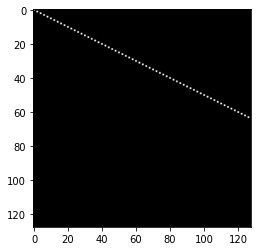

In [14]:
signalImage = [[y for y in x] for x in Signal2D]
fftimage = [[s[0]**2+s[1]**2 for s in sig] for sig in fft2d]
plt.imshow(signalImage,cmap='gist_gray')

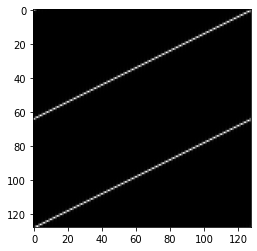

In [15]:
plt.imshow(fftimage,cmap='gist_gray')

## Example Testing

In [16]:
a = plt.imread('image/cameraman.jpg')

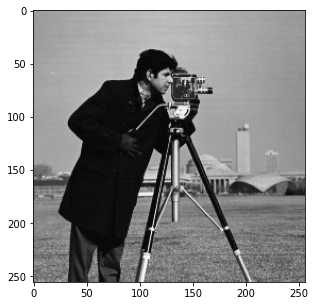

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(a,cmap='gist_gray')

In [18]:
a = a/255

In [19]:
a = a.tolist()

In [20]:
%%time
fft_data = FFT2D(a)

CPU times: user 1.53 s, sys: 16.7 ms, total: 1.54 s
Wall time: 1.54 s


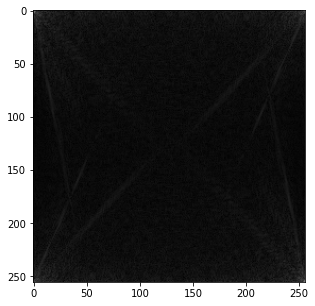

In [21]:
fftimage = [[m.sqrt(m.sqrt(s[0]**2+s[1]**2)) for s in sig] for sig in fft_data]
fftimage = np.array(fftimage)
fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)
fftimage = fftimage.tolist()
plt.figure(figsize=(5,5))
plt.imshow(fftimage,cmap='gist_gray')

In [22]:
%%time
ifft = IFFT2D(fft_data)

CPU times: user 1.32 s, sys: 30.1 ms, total: 1.35 s
Wall time: 1.31 s


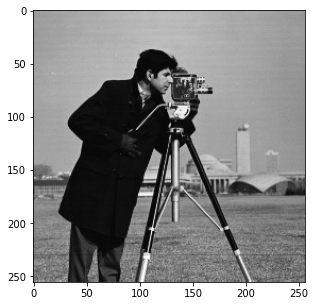

In [23]:
fftimage = [[s[0] for s in sig] for sig in ifft]
# fftimage = np.array(fftimage)
# fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)
# fftimage = fftimage.tolist()
plt.figure(figsize=(5,5))
plt.imshow(fftimage,cmap='gist_gray')

In [24]:
def plotImage(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image,cmap='gist_gray')

In [25]:
def Normalize(image):
    if image.shape[-1]==1:  # add conditions to check color channels
        image = (image/255)
    elif image.shape[-1]==3:
        image = np.mean(image,axis=2)
        image = (image/255)
    if image.shape[0]==image.shape[1]:
        if not (image.shape[0])&(image.shape[0]-1):
            return image.tolist()
        else:
            pad = (1<<int(m.log2(image.shape[0])+1))-image.shape[0]
            # add column
            col = np.zeros((image.shape[0],pad))
            image = np.append(image,col,axis=1)
            # add rows
            row = np.zeros((pad,image.shape[1]))
            image = np.append(image,row,axis=0)
            return image.tolist()

In [26]:
def PlotFFT(fft_data):
    fftimage = [[m.sqrt(m.sqrt(s[0]**2+s[1]**2)) for s in sig] for sig in fft_data]
    fftimage = np.array(fftimage)
    fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)
    
    fft0 = fftimage[:len(fftimage)//2,:len(fftimage)//2]
    fft1 = fftimage[len(fftimage)//2:,:len(fftimage)//2]
    fft2 = fftimage[:len(fftimage)//2,len(fftimage)//2:]
    fft3 = fftimage[len(fftimage)//2:,len(fftimage)//2:]
    
    fft32 = np.append(fft3,fft2,axis=0)
    fft10 = np.append(fft1,fft0,axis=0)
    
    fft3210 = np.append(fft32,fft10,axis=1)
    
    fftimage = fft3210.tolist()
    plt.figure(figsize=(5,5))
    plt.imshow(fftimage,cmap='gist_gray')

In [27]:
def ImageProcess(path):
    image = Normalize(plt.imread(path))
    plotImage(image)
    
    fft_data = FFT2D(image)
    
    PlotFFT(fft_data)
#     fftimage = [[m.sqrt(m.sqrt(s[0]**2+s[1]**2)) for s in sig] for sig in fft_data]
#     fftimage = np.array(fftimage)
#     fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)
#     fftimage = fftimage.tolist()
#     plotImage(fftimage)
    
    ifft = IFFT2D(fft_data)
    ifftimage = [[s[0] for s in sig] for sig in ifft]
    plotImage(ifftimage)

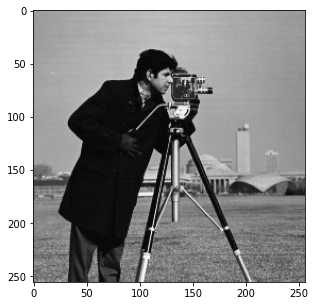

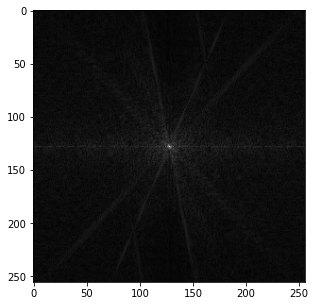

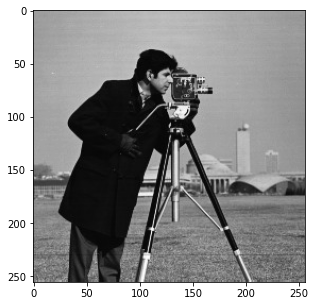

In [28]:
ImageProcess('image/cameraman.jpg')

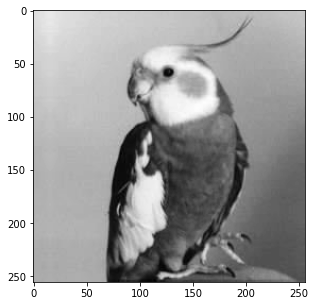

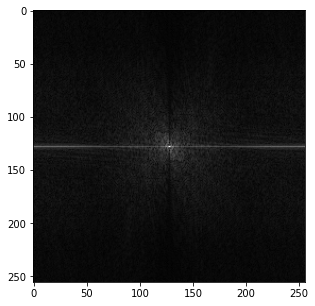

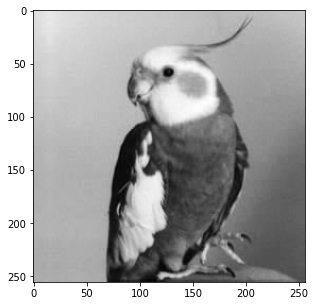

In [29]:
ImageProcess('image/parrot.jpg')

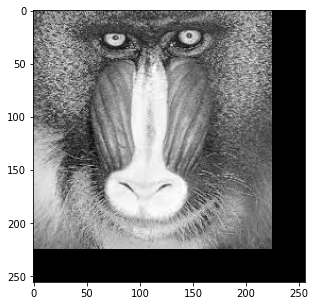

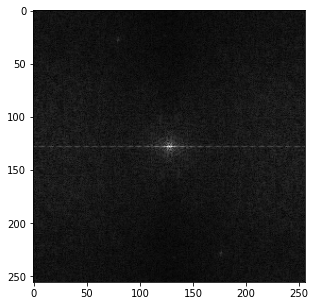

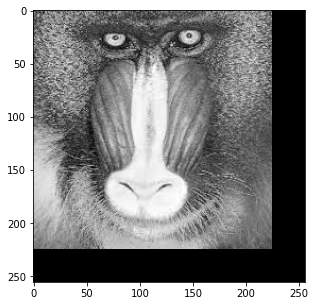

In [30]:
ImageProcess('image/baboon.jpeg')

In [31]:
def LowFrequencyPass(path,freq=100,x=0):
    image = Normalize(plt.imread(path))
    plotImage(image)
    
    test = True

    fft = FFT2D(image)
    for i,sig in enumerate(fft):
        for j,s in enumerate(sig):
            if x==-1:
                test = m.sqrt(i**2+j**2)<freq
            else:
                test = m.sqrt(i**2+j**2)>freq
            if test:
                s[0]=0
                s[1]=0

    PlotFFT(fft)
#     fftimage = [[m.sqrt(m.sqrt(s[0]**2+s[1]**2)) for s in sig] for sig in fft]
#     fftimage = np.array(fftimage)
#     fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)
#     fftimage = fftimage.tolist()
#     plotImage(fftimage)
    
    ifft = IFFT2D(fft)
    ifftimage = [[s[0] for s in sig] for sig in ifft]
    plotImage(ifftimage)

/tmp/ipykernel_5498/1485074703.py:4: RuntimeWarning: invalid value encountered in divide
  fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)


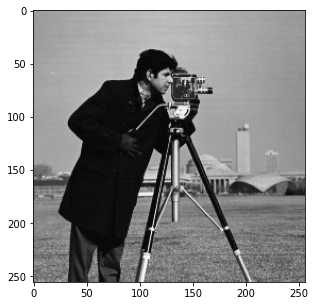

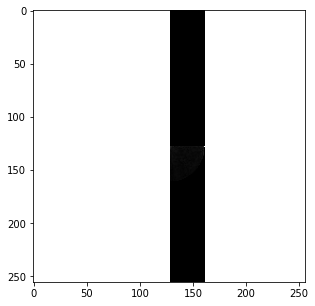

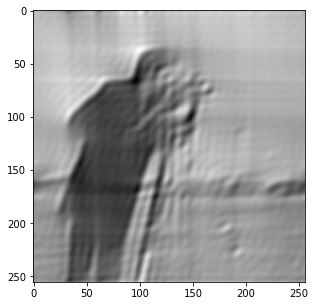

In [32]:
LowFrequencyPass('image/cameraman.jpg',33,1)

In [33]:
def LowEnergyPass(path,energy=10,x=0):
    image = Normalize(plt.imread(path))
    plotImage(image)
    
    fft = FFT2D(image)
    for sig in fft:
        for s in sig:
            if x==-1 and (s[0]**2+s[1]**2)>energy:
                s[0]=0
                s[1]=0
            elif x!=-1 and (s[0]**2+s[1]**2)<energy:
                s[0]=0
                s[1]=0

    PlotFFT(fft)
#     fftimage = [[m.sqrt(m.sqrt(s[0]**2+s[1]**2)) for s in sig] for sig in fft]
#     fftimage = np.array(fftimage)
#     fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)
#     fftimage = fftimage.tolist()
#     plotImage(fftimage)
    
    ifft = IFFT2D(fft)
    ifftimage = [[s[0] for s in sig] for sig in ifft]
    plotImage(ifftimage)

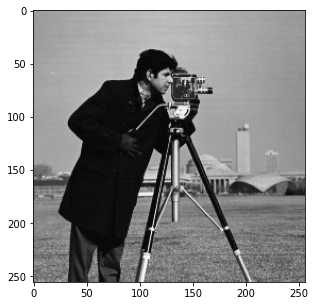

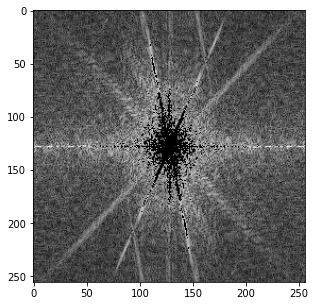

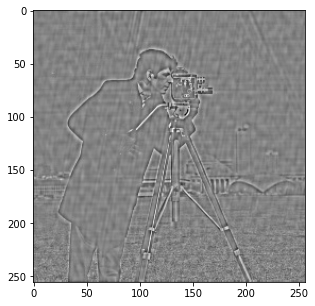

In [34]:
LowEnergyPass('image/cameraman.jpg',0.088,-1)

## example of EdgeDetection

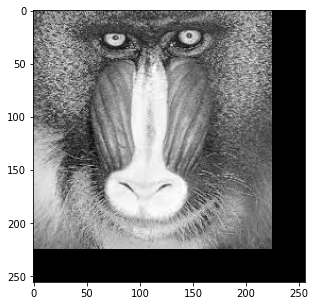

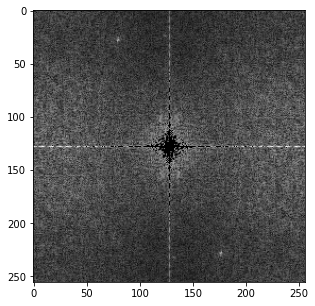

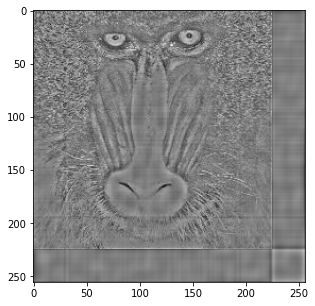

In [35]:
LowEnergyPass('image/baboon.jpeg',0.000005,-1)

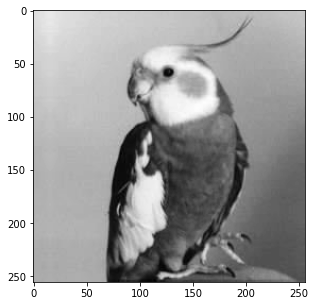

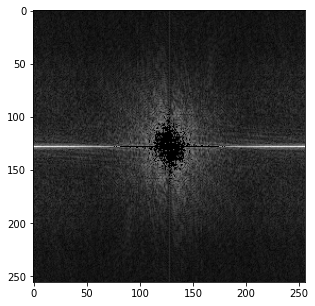

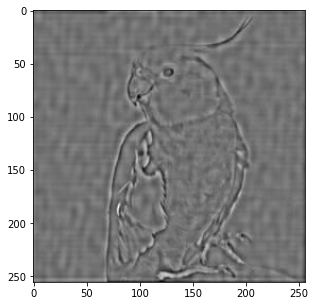

In [36]:
LowEnergyPass('image/parrot.jpg',0.1,-1)

## Testing Blur and Edge Detection

In [37]:
def TestFunction(path,freq=100,x=0):
    image = Normalize(plt.imread(path))
    plotImage(image)
    
    test = True

    fft = FFT2D(image)
    for i,sig in enumerate(fft):
        for j,s in enumerate(sig):
            if x==-1:
                test = (m.sqrt(i**2+j**2)<freq or m.sqrt(i**2+(len(sig)-j)**2)<freq
                        or m.sqrt((len(sig)-i)**2+j**2)<freq or m.sqrt((len(sig)-i)**2+(len(sig)-j)**2)<freq)
            else:
                test = (m.sqrt(i**2+j**2)>freq and m.sqrt(i**2+(len(sig)-j)**2)>freq
                        and m.sqrt((len(sig)-i)**2+j**2)>freq and m.sqrt((len(sig)-i)**2+(len(sig)-j)**2)>freq)
            if test:
                s[0]=0
                s[1]=0

    PlotFFT(fft)
#     fftimage = [[m.sqrt(m.sqrt(s[0]**2+s[1]**2)) for s in sig] for sig in fft]
#     fftimage = np.array(fftimage)
#     fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)
#     fftimage = fftimage.tolist()
#     plotImage(fftimage)
    
    ifft = IFFT2D(fft)
    ifftimage = [[s[0] for s in sig] for sig in ifft]
    plotImage(ifftimage)

/tmp/ipykernel_5498/1485074703.py:4: RuntimeWarning: invalid value encountered in divide
  fftimage = fftimage/np.ndarray.sum(fftimage,axis=1)


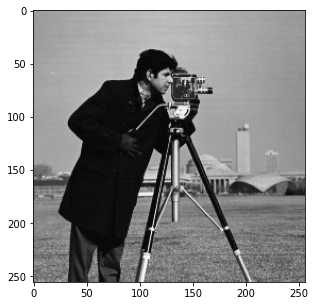

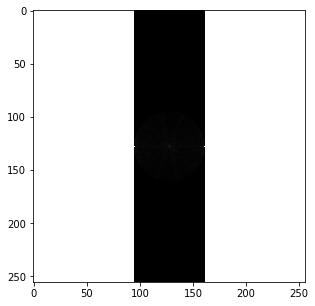

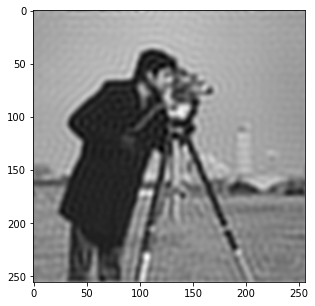

In [38]:
TestFunction('image/cameraman.jpg',33,1)

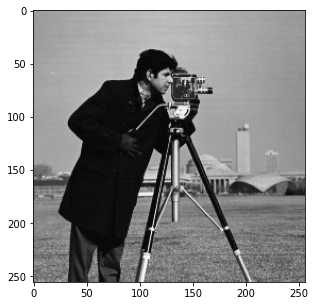

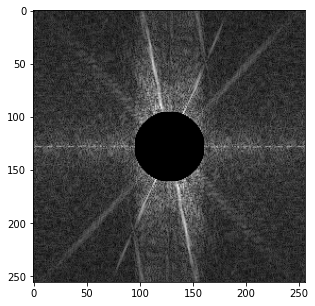

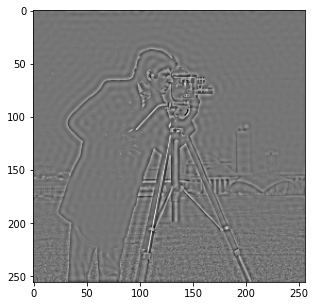

In [39]:
TestFunction('image/cameraman.jpg',33,-1)

In [40]:
def PercentEnergyPass(path,percentages,x=0):
    image = Normalize(plt.imread(path))
    plotImage(image)
    fft = FFT2D(image)
    npfft = np.array(fft)
    npfft0 = np.square(npfft[:,:,0])
    npfft1 = np.square(npfft[:,:,1])
    npfft = np.sqrt(npfft0 + npfft1)
    total = np.sum(npfft)
    
    temp = np.reshape(npfft,-1)
    index = temp.argsort()[::-1]
    index_xy = []
    for percent in percentages:
        i_xy = []
        sum_total = 0
        for i in index:
            i_xy.append(i)
            sum_total += temp[i]
            if sum_total>total*percent/100:
                break
        index_xy.append(i_xy)
        for percent,index in zip(percentages,index_xy):
            if not x==-1:
                fftp = np.zeros((npfft.shape[0],npfft.shape[1],2))
                fftp = np.asarray(fftp)
                for i in index:
                    fftp[i%len(fft)][i//len(fft)][0]=fft[i%len(fft)][i//len(fft)][0]
                    fftp[i%len(fft)][i//len(fft)][1]=fft[i%len(fft)][i//len(fft)][1]
            else:
                fftp = fft
                for i in index:
                    fftp[i%len(fft)][i//len(fft)][0] = 0
                    fftp[i%len(fft)][i//len(fft)][1] = 0 
        ifft = IFFT2D(fftp)
        ifftimage = [[s[0] for s in sig] for sig in ifft]
        plotImage(ifftimage)

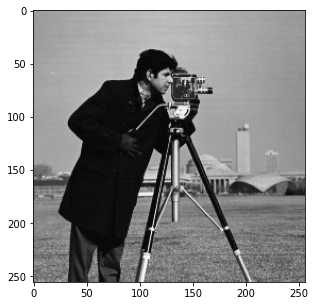

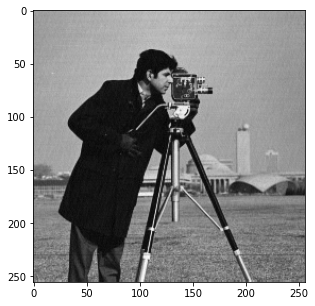

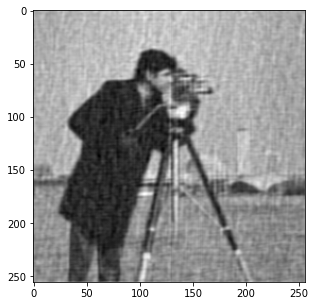

In [41]:
PercentEnergyPass('image/cameraman.jpg',[99,50])

In [42]:
def PercentFrequencyPass(path,percentages):
    image = Normalize(plt.imread(path))
    plotImage(image)
    fft = FFT2D(image)
    npfft = np.array(fft)
    npfft0 = np.square(npfft[:,:,0])
    npfft1 = np.square(npfft[:,:,1])
    npfft = np.sqrt(npfft0 + npfft1)
    total = np.sum(npfft)
    
    temp = np.reshape(npfft,-1)
    index = temp.argsort()[::-1]
    index_xy = []
    for percent in percentages:
        i_xy = []
        for i in index[:int(len(index)*percent/100)]:
            i_xy.append(i)
        index_xy.append(i_xy)
        
    for percent,index in zip(percentages,index_xy):
        fftp = np.zeros((npfft.shape[0],npfft.shape[1],2))
        fftp = np.asarray(fftp)
        for i in index:
            fftp[i%len(fft)][i//len(fft)][0]=fft[i%len(fft)][i//len(fft)][0]
            fftp[i%len(fft)][i//len(fft)][1]=fft[i%len(fft)][i//len(fft)][1]
    
        ifft = IFFT2D(fftp)
        ifftimage = [[s[0] for s in sig] for sig in ifft]
        plotImage(ifftimage)

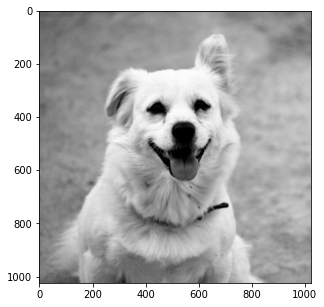

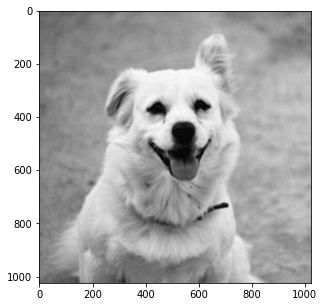

In [43]:
PercentFrequencyPass('image/doggo.jpg',[5])

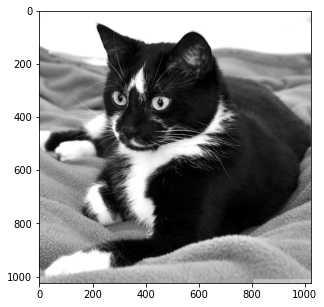

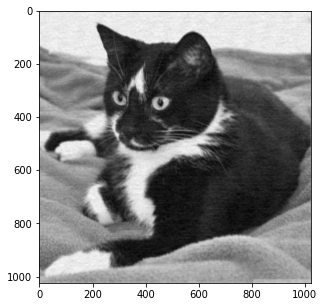

In [44]:
PercentFrequencyPass('image/catto.jpg',[5])